Problem 2: Prediction of Number of shares using various Regression Models

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('News.csv')


Modeling and Processing The Dataset.

Now we will check if the dataset contains duplicates.

In [3]:
dataset.drop_duplicates()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


check if it has null values

In [4]:
dataset.isnull().values.any()

False

Drop the Url Column, Encoding it will take huge time and anyways it is unique

In [5]:
dataset1 = dataset.drop(['url'],axis=1)
dataset1.columns = dataset1.columns.str.replace(" ","")
dataset1.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
dataset1['n_non_stop_words'].values.mean()

0.9964685654578609

We can check if we can drop any linearly dependent variables. Hence I followed about how to draw a person corelation graph.

<ipython-input-7-bb40a535f9bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dataset.corr(method ='pearson')


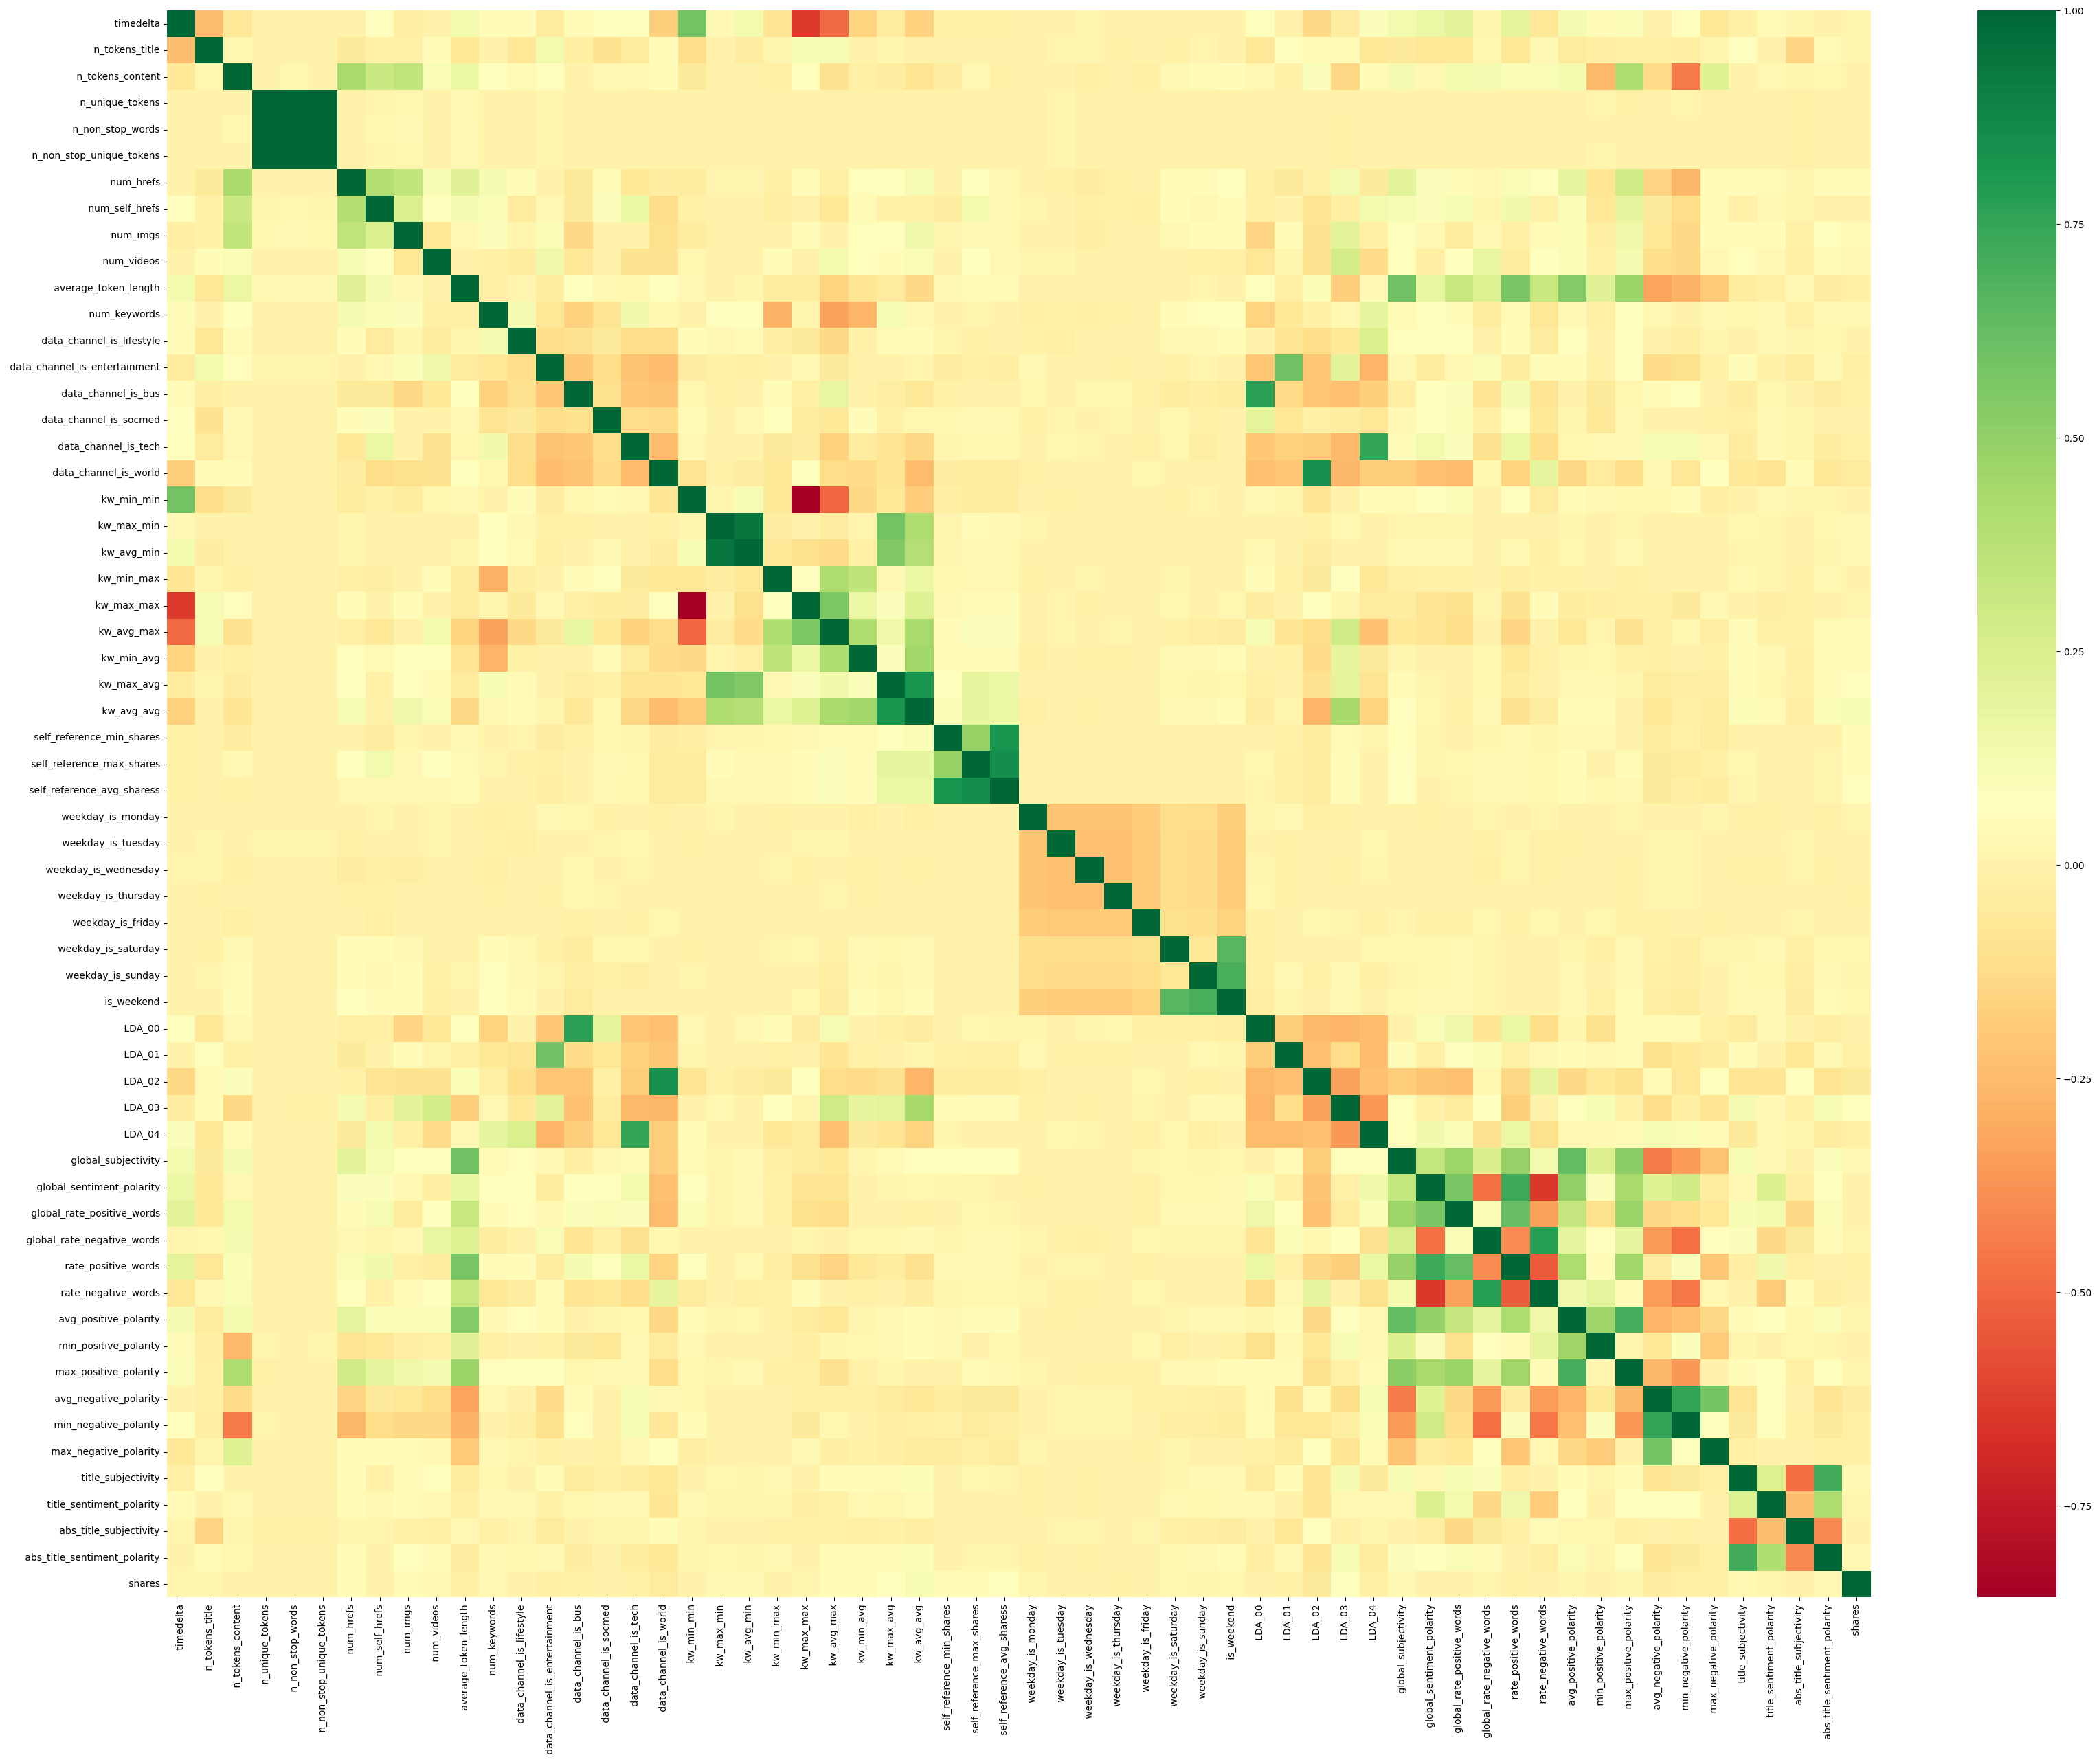

In [7]:
plt.figure(figsize=(40,30))
cor = dataset.corr(method ='pearson')
sns.heatmap(cor, cmap="RdYlGn")
plt.show()

As we can see that th bigger green square means that the variable forming that square are linearly dependant to each other. There are 2 such groups, Hence we can go ahead and drop all except one of each group.

In [8]:
dataset1 = dataset1.drop(['timedelta','n_non_stop_words','n_unique_tokens','kw_avg_min','kw_avg_avg','self_reference_avg_sharess'],axis=1)

Also we can merge the content which is based on weekdays or is based on type of data channel.

In [9]:
publishdayMerge = dataset1[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday']]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday')
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')


dataset1.insert(loc=11, column='weekdays', value=temp_arr)


In [10]:
dataset1['weekdays'].astype(str)

0           Monday
1           Monday
2           Monday
3           Monday
4           Monday
           ...    
39639    Wednesday
39640    Wednesday
39641    Wednesday
39642    Wednesday
39643    Wednesday
Name: weekdays, Length: 39644, dtype: object

In [11]:
DataChannelMerge = dataset1[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus', 'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]

DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

dataset1.insert(loc=12,column='data_channel', value=DataChannel_arr)

In [12]:
dataset1['data_channel'].astype(str)

0        Entertainment
1             Business
2             Business
3        Entertainment
4                 Tech
             ...      
39639             Tech
39640     Social Media
39641           Others
39642            World
39643    Entertainment
Name: data_channel, Length: 39644, dtype: object

In [13]:
dataset1.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'weekdays', 'data_channel',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_pola

Remove the rows without any content.

In [14]:
dataset1 = dataset1[dataset1['n_tokens_content'] != 0]
dataset1.shape

(38463, 56)

In [15]:
dataset1.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'weekdays', 'data_channel',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_pola

In [16]:
#dataset1 = dataset1.drop(labels= ['shares'],axis = 1,inplace=False)
dataset1.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'weekdays', 'data_channel',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_pola

Creating a Training set and label set from the dataset.
Add Dummy variables for Weekdays and Data_Channel columns.


In [17]:
from copy import copy
training_set = dataset1.iloc[:, :-1]
# convert categorical variables into dummy - it use one-hot encoding
training_set = pd.get_dummies(training_set)

# extract the label data in this case popularity
label_set = dataset1.iloc[:, -2:-1].values

data_feature2 = copy(training_set)
training_set.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_

In [18]:
label_set

array([[0.1875    ],
       [0.        ],
       [0.        ],
       ...,
       [0.13636364],
       [0.        ],
       [0.25      ]])

In [19]:
training_set.shape

(38463, 67)

In [20]:
training_set = training_set.drop(['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world','weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend'],axis=1)

Select the most important training set columns which seem to impact the shares.

In [21]:
data_feature1 =training_set[['n_tokens_title','n_tokens_content','num_hrefs',
                       'num_self_hrefs','num_imgs','num_videos','average_token_length','num_keywords','global_subjectivity',
                       'global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words',
                       'avg_negative_polarity','title_sentiment_polarity','weekdays_Friday', 'weekdays_Monday',
       'weekdays_Saturday', 'weekdays_Sunday', 'weekdays_Thursday',
       'weekdays_Tueday', 'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World']]

In [22]:
data_feature1.shape

(38463, 28)

Defined a Fisher Scoring Function for a variable. Higher Fisher score means higher impact on deciding the data.

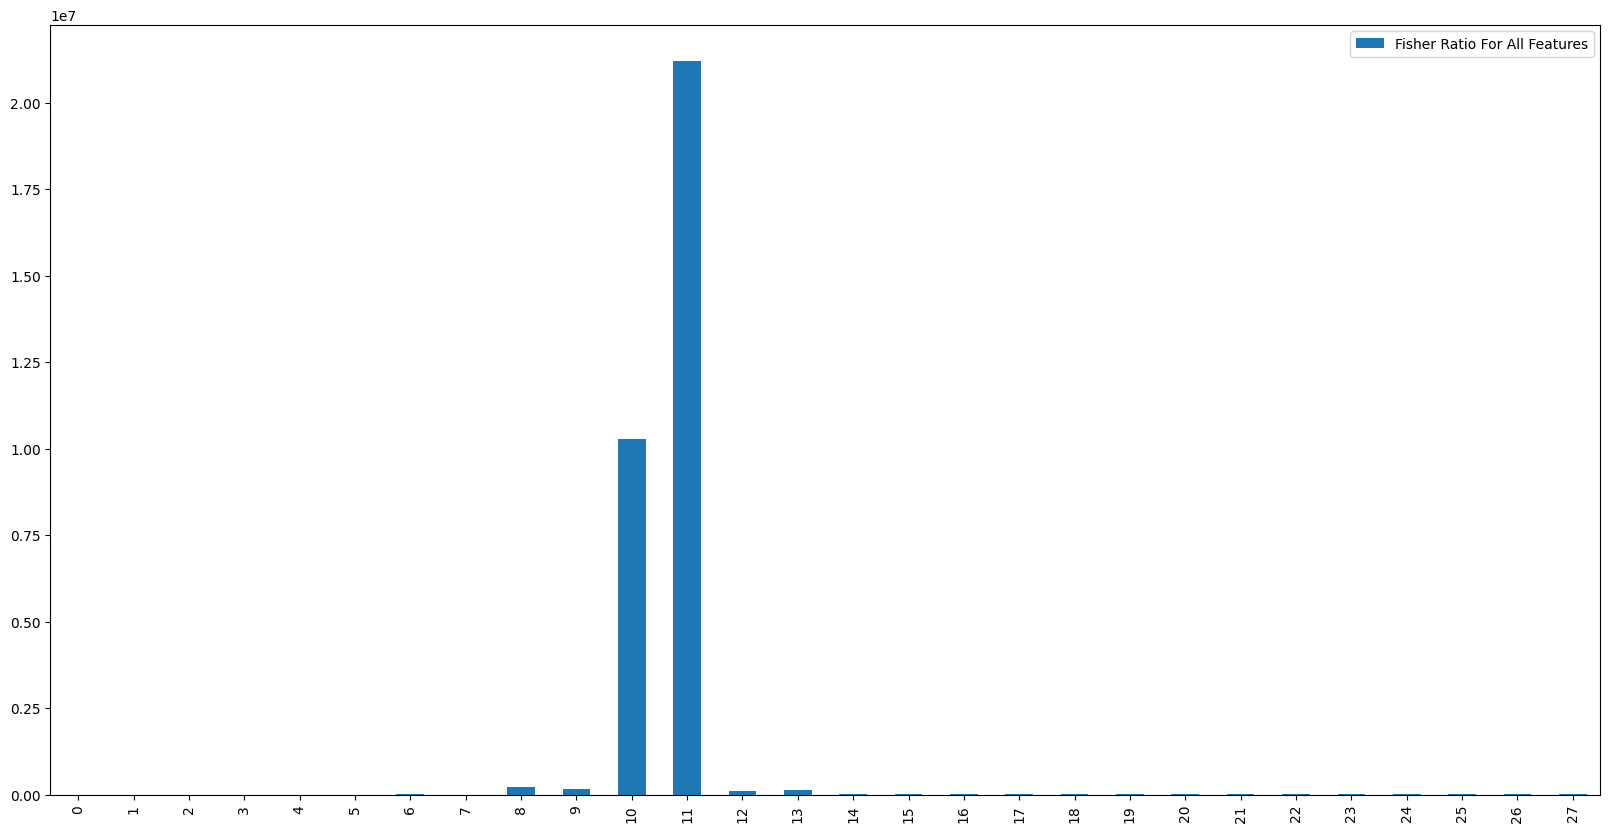

In [23]:
def fisher_index_calc(trainingSet, labelSet):
    (dim1_T, dim2_T) = trainingSet.shape
    (dim1_L, dim2_L) = labelSet.shape

    fisher_ratios = np.zeros((1, dim2_T), dtype=float).flatten()

    if dim1_L != dim1_T:
        return fisher_ratios


    train1 = pd.DataFrame(trainingSet)
    label1 = pd.DataFrame(labelSet, columns=['LABEL'])
    grouped = pd.concat([train1, label1], axis=1)

    (no_classes, demo) = grouped.groupby('LABEL').count()[[0]].shape


    for j in range(dim2_T):

        j_variance = np.var(trainingSet[:,j])
        j_mean = np.mean(trainingSet[:,j])
        j_summation = 0
        for k in range(no_classes):
            output = grouped.groupby('LABEL').count()[[j]]
            k_feature_count = output.iloc[k,0]
            output = grouped.groupby('LABEL').mean()[[j]]
            k_feature_mean = output.iloc[k,0]
            currentSum = k_feature_count * np.square((k_feature_mean - j_mean))
            j_summation = j_summation + currentSum
        fisher_ratios[j] = j_summation / np.square(j_variance)

    return fisher_ratios

fisher_scores = fisher_index_calc(data_feature1.values, label_set)

df = pd.DataFrame({'Fisher Ratio For All Features': fisher_scores})

ax = df.plot.bar(figsize=(20,10))
plt.show()


In [24]:
to_remove = []
for i in range((len(fisher_scores))):
    if fisher_scores[i] < 3000:
        to_remove.append(i)


data_feature_fisher = data_feature1.drop(data_feature1.columns[to_remove], axis=1, inplace=False)
print (data_feature_fisher.shape)
data_feature_fisher.columns

(38463, 21)


Index(['average_token_length', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'avg_negative_polarity',
       'title_sentiment_polarity', 'weekdays_Friday', 'weekdays_Monday',
       'weekdays_Saturday', 'weekdays_Sunday', 'weekdays_Thursday',
       'weekdays_Tueday', 'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World'],
      dtype='object')

In [25]:
data_feature_fisher['shares'] = label_set

In [26]:
data_feature_fisher.columns

Index(['average_token_length', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'avg_negative_polarity',
       'title_sentiment_polarity', 'weekdays_Friday', 'weekdays_Monday',
       'weekdays_Saturday', 'weekdays_Sunday', 'weekdays_Thursday',
       'weekdays_Tueday', 'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World', 'shares'],
      dtype='object')

In [46]:
data_feature_fisher.shape

(38463, 22)

Divide the data in X and y

In [27]:
X = data_feature_fisher.iloc[:,:-1].values
y = data_feature_fisher.iloc[:, -1].values
y = y.reshape(len(y),1)

## Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling(Only for SVM)

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_fs = sc_X.fit_transform(X_train)
y_train_fs = sc_y.fit_transform(y_train)

## Training all Models on the Training set

Training The set on Multiple Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
regressormlr = LinearRegression()
regressormlr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred_mlr = regressormlr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_mlr.reshape(len(y_pred_mlr),1), y_test.reshape(len(y_test),1)),1))

[[0.16 0.  ]
 [0.1  0.  ]
 [0.16 0.  ]
 ...
 [0.4  0.7 ]
 [0.13 0.03]
 [0.17 0.  ]]


In [32]:
from sklearn.metrics import r2_score, accuracy_score

print(r2_score(y_test, y_pred_mlr))


0.19675021474009913


Training The set on Polynomial Regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressorply = LinearRegression()
regressorply.fit(X_poly, y_train)

LinearRegression()

In [34]:
y_pred_plr = regressorply.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_plr.reshape(len(y_pred_plr),1), y_test.reshape(len(y_test),1)),1))

[[0.07 0.  ]
 [0.07 0.  ]
 [0.08 0.  ]
 ...
 [0.66 0.7 ]
 [0.06 0.03]
 [0.08 0.  ]]


In [35]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred_plr))

0.856392155392395


Training The set on SVM Regression with feature-scaled data.

In [36]:
from sklearn.svm import SVR
regressorsvm = SVR(kernel = 'rbf')
regressorsvm.fit(X_train_fs, y_train_fs)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [37]:
y_pred_svm = sc_y.inverse_transform(regressorsvm.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)),1))

[[0.02 0.  ]
 [0.03 0.  ]
 [0.04 0.  ]
 ...
 [0.75 0.7 ]
 [0.03 0.03]
 [0.02 0.  ]]


In [38]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred_svm))

0.9555647834377078


Training The set on Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor
regressordtr = DecisionTreeRegressor(random_state = 0)
regressordtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [40]:
y_pred_dtr = regressordtr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_dtr.reshape(len(y_pred_dtr),1), y_test.reshape(len(y_test),1)),1))

[[1.52e-20 0.00e+00]
 [1.52e-20 0.00e+00]
 [1.52e-20 0.00e+00]
 ...
 [7.00e-01 7.00e-01]
 [3.12e-02 3.12e-02]
 [1.52e-20 0.00e+00]]


In [41]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred_dtr))

0.9999850680700398


Training The set on Random Forest Regression(n_estimates = 10)

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressorrfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressorrfr.fit(X_train, y_train)

<ipython-input-42-ad0a12fa2feb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressorrfr.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [43]:
y_pred_rfr = regressorrfr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_rfr.reshape(len(y_pred_rfr),1), y_test.reshape(len(y_test),1)),1))

[[1.45e-20 0.00e+00]
 [1.45e-20 0.00e+00]
 [1.45e-20 0.00e+00]
 ...
 [7.00e-01 7.00e-01]
 [3.08e-02 3.12e-02]
 [1.45e-20 0.00e+00]]


In [44]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred_rfr))

0.9999882661674305


## Evaluating the Model Performances

---



In [45]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred_mlr))
print(r2_score(y_test, y_pred_plr))
print(r2_score(y_test, y_pred_svm))
print(r2_score(y_test, y_pred_dtr))
print(r2_score(y_test, y_pred_rfr))

0.19675021474009913
0.856392155392395
0.9555647834377078
0.9999850680700398
0.9999882661674305
